# Learning From Data

### Data
- source: https://www.kaggle.com/datasets/willianoliveiragibin/bank-churn-prediction

### Code Github Repo
- https://github.com/kibambe-0167/lrd-first 


### About Data
In the synthetic dataset for the Playground Series S4 E1 Binary Classification with a Bank Churn Dataset, various features have been engineered to capture relevant information about customers. 
- The dataset includes label-encoded surnames and features derived from them using the TFIDF vectorizer. 
- The credit score serves as a numerical representation of a customer's creditworthiness.
- Geography feature indicates the country of residence, with one-hot encoding for France, Spain, and Germany.
- Gender is represented with one-hot encoding for male and female categories.
- Age, tenure, balance, and the number of products used by the customer offer insights into their banking behavior.
- The presence of a credit card, active membership status, and estimated salary are also included as binary features.
- Notable engineered features provide additional insights. 
- Mem__no__Products is the product of the number of products and active membership status, offering a combined metric. 
- Cred_Bal_Sal represents the ratio of the product of credit score and balance to estimated salary, providing a relative measure of financial health. 
- The balance-to-salary ratio (Bal_sal) and the tenure-to-age ratio (Tenure_Age) offer further dimensions for analysis. 
- Finally, Age_Tenure_product is a feature capturing the interaction between age and tenure.
- The target variable, 'Exited,' indicates whether a customer has churned, with a value of 1 for churned customers and 0 for those who have not. 

This dataset, with its diverse set of features and engineered metrics, provides a comprehensive foundation for binary classification tasks, enabling the exploration of factors influencing customer churn in the banking domain. 
Analysts and data scientists can leverage these features to build predictive models and gain insights into the dynamics of customer retention.

In [70]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import gmean
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# 
random.seed(18)
np.random.seed(18)
sns.set_theme(style="darkgrid") # for theme | "darkgrid", "whitegrid", "dark", "white", "ticks"
pd.set_option('display.max_columns', 25)

# Data Loading

In [71]:
all_dataset = "./data/bank_churn.csv"
small_dataset = "./data/bank_churn_small.csv" # for testing
# 
df = pd.read_csv(all_dataset, low_memory=False)
df.head()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


In [72]:
# df.tail()
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_tfidf_0,Surname_tfidf_1,Surname_tfidf_2,Surname_tfidf_3,Surname_tfidf_4,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,"-3.124.436.679,76","-460.594.640,32","13.351.443.755,82","-6.116.396.019,04","6.694.577.725,07",1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,"481.338.256,69","838.931.547,32","-11.828.148.560,09","7.812.514.313,22","1.663.329.080,86",1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,"-3.447.294.172.650.730,00","-2.025.033.659.055.650,00","-10.280.719.705.962.700,00","-938.715.514.665.035,00","15.068.643.143.363.400,00",1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,"-72.209.360.028,78","-10.461.631.817.033.800,00","131.291.330.459.128,00","846.300.277.850.006,00","16.075.843.065.996.200,00",1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,"-1.037.134.935,85","-545.133.813,64","498.455.946,81","-1.568.877.112,96","18.489.187.336,37",0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,"-4.763,76","114.119,45","1.165.557,26","-1.177.944,59","-4.259.289,45",1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,"-15.103,70","68.546,18","46.744,02","-583.449,86","-419.871,58",1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,"83.065.226.551,40","9.769.052.344.005.960,00","16.065.539.886.799,00","-7.042.490.682.870.180,00","18.834.370.862.998,00",1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0


# Data Cleaning

### Drop columns that are not useful for data visualisation | analysis surnames

- the below columns, surname, tfidf are not that important for EDA and machine learning
- Surname , Surname_tfidf_0 , Surname_tfidf_1 , Surname_tfidf_2 , Surname_tfidf_3 , Surname_tfidf_4

In [73]:
df.drop(
  columns=['Surname', 'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2', 'Surname_tfidf_3', 'Surname_tfidf_4'], inplace= True, axis=1
)
print(df.columns.shape)
df.head()

(19,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0


### Put geography features into a single feature for easy usage | to categorical

- put the geography location of the samples into a single feature column. 
- france: 1 .. germany: 2 .. spain: 3 .. unknown/not clear: 4

##### why
- better computational usage, as compared to one-hot encoded
- curse of dimensionality
- avoid to many zeros: to reduce memory usage with many zeros.
- data is more than 150K
- what i'm about to do[sparse] might bring more computational overhead as compared one-hot encoded.
- easy to manage less number of features for visualisations and relationship between features

In [74]:
a = np.array(df['France'].values)
b = np.array(df['Germany'].values)
c = np.array(df['Spain'].values)

d = []
for i in range(len(a)):
  if a[i] == 1 and b[i] != 1 and c[i] != 1: d.append(1) # france
  elif b[i] == 1 and a[i] != 1 and c[i] != 1 : d.append(2) # germany
  elif c[i] == 1 and b[i] != 1 and a[i] != 1: d.append(3) # spain
  else: d.append(4) # for unknown
  
# add the new feature column back to the dataset
df['Country'] = np.array(d)
# 
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1


### Make male and features features into a single feature for easy usage | to categorical

- make the female and male features, into a single sparse feature called [gender]. 
- female: 1 .. male: 0

In [75]:
a = np.array(df['Female'].values)
b = np.array(df['Male'].values)

d = []
for i in range(len(a)):
  if a[i] == 1 and b[i] != 1: d.append(1) # female
  elif b[i] == 1 and a[i] != 1: d.append(0) # male
  else: d.append(3) # for unknown
  
# add the new feature column back to the dataset
df['Gender'] = np.array(d)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country,Gender
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0,1,0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1,0
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1,0
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1,0


#### remove columns turned into sparse fron one-hot encoded
France .. Germany .. Spain .. Female .. male

In [76]:
df.drop(columns=['France', 'Germany', 'Spain', 'Female', 'Male'], inplace=True, axis=1)
print(f"number of columns: {df.columns.shape}")
df

number of columns: (16,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product,Country,Gender
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0,1,0
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0,1,0
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0.0,0.0,0.0,0.25,400.0,1,0
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0,1,0
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0,1,0
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0,1,1
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0,1,0
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0,1,0


### fix columns that have data type of "objects" to float/int/categorical

- for columns : CreditBalanceSalary . EstimatedSalary . BalanceSalary . TenureAge

In [77]:
def dtype_objects_float(x):
  """change dtype of data from object to float for manipulation"""
  return float(str(x).replace(".", "").replace(",", "."))

df["CreditBalanceSalary"] = df["Cred_Bal_Sal"].apply(lambda x: dtype_objects_float(x))
df["EstimatedSalary"] = df["EstimatedSalary"].apply(lambda x: dtype_objects_float(x))
df["BalanceSalary"] = df["Bal_sal"].apply(lambda x: dtype_objects_float(x))
df["TenureAge"] = df["Tenure_Age"].apply(lambda x: dtype_objects_float(x))
# 
#  Drop columns we changed data type from object float
df.drop(columns=['Cred_Bal_Sal','Bal_sal','Tenure_Age'], inplace=True, axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Mem__no__Products,Age_Tenure_product,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,668.0,33.0,3.0,0.00,2.0,1,0,18144997.0,0,0.0,99.0,1,0,0.000000e+00,0.000000e+00,9.090909e+15
1,627.0,33.0,1.0,0.00,2.0,1,1,495035.0,0,2.0,33.0,1,0,0.000000e+00,0.000000e+00,3.030303e+16
2,678.0,40.0,10.0,0.00,2.0,1,0,18486669.0,0,0.0,400.0,1,0,0.000000e+00,0.000000e+00,2.500000e+01
3,581.0,34.0,2.0,148882.54,1.0,1,1,8456088.0,0,1.0,68.0,1,0,1.022941e+16,1.760655e+16,5.882353e+16
4,716.0,33.0,5.0,0.00,2.0,1,1,1506883.0,0,2.0,165.0,3,0,0.000000e+00,0.000000e+00,1.515152e+16


### Normalise column/feature names

In [78]:
df.rename(columns={"Mem__no__Products": "MemberNoProducts", "Age_Tenure_product": 'AgeTenureProduct'}, inplace=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,668.0,33.0,3.0,0.00,2.0,1,0,18144997.0,0,0.0,99.0,1,0,0.000000e+00,0.000000e+00,9.090909e+15
1,627.0,33.0,1.0,0.00,2.0,1,1,495035.0,0,2.0,33.0,1,0,0.000000e+00,0.000000e+00,3.030303e+16
2,678.0,40.0,10.0,0.00,2.0,1,0,18486669.0,0,0.0,400.0,1,0,0.000000e+00,0.000000e+00,2.500000e+01
3,581.0,34.0,2.0,148882.54,1.0,1,1,8456088.0,0,1.0,68.0,1,0,1.022941e+16,1.760655e+16,5.882353e+16
4,716.0,33.0,5.0,0.00,2.0,1,1,1506883.0,0,2.0,165.0,3,0,0.000000e+00,0.000000e+00,1.515152e+16


### Missing values and duplicates values | no values

In [79]:
# check for null value
df.isnull().sum().sum()

0

In [80]:
# check for na values
df.isna().sum().sum()

0

In [81]:
# number of duplicates samples
df.duplicated().sum()

569

### Drop duplicates

In [82]:
print(f"Before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"number of duplicates: {df.duplicated().sum()}")
print(f"After dropping duplicates: {df.shape}")

Before dropping duplicates: (175028, 16)
number of duplicates: 0
After dropping duplicates: (174459, 16)


### Clean CreditBalanceSalary - Apply Log Scale

- about 93020 samples where missing or value of 0, that about 53% of the entire dataset samples
- the max value is: 8.14001311084624e+16
- a log scale will be applied to make the data fall within 0 to 100
- the values where shifted by 1, to prevent division by zero on log

In [83]:
df['CreditBalanceSalary'].max()

8.14001311084624e+16

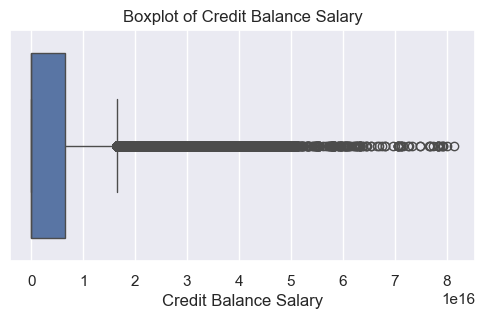

In [84]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['CreditBalanceSalary'])
plt.title("Boxplot of Credit Balance Salary")
plt.xlabel("Credit Balance Salary")
plt.show()

#### Apply natural logarithm scale to column:
- i added one(1) to each value of the column, because the log of 0, will give an error/warning

In [85]:
def apply_log_scale_range_to_large_columns(column_data, max=100 ):
  # i added one(1) to each value of the column, because the log of 0, will give an error/warning
  xx = np.log(column_data + 1)
  logmx = xx.max()
  logmn = xx.min()
  x = ((xx - logmn) / (logmx - logmn)) * (max - 1) + 1 # add one to make value 1 - 100
  # 
  return x

In [86]:
# 
x = apply_log_scale_range_to_large_columns( df['CreditBalanceSalary'] )
# store value back to column
df['CreditBalanceSalary'] = x
# 
print(f"\nmin after range to log scale: {x.min()} \nmax after range log scale: { x.max()}")


min after range to log scale: 1.0 
max after range log scale: 100.0


#### CreditBalanceSalary values, after applying log scale

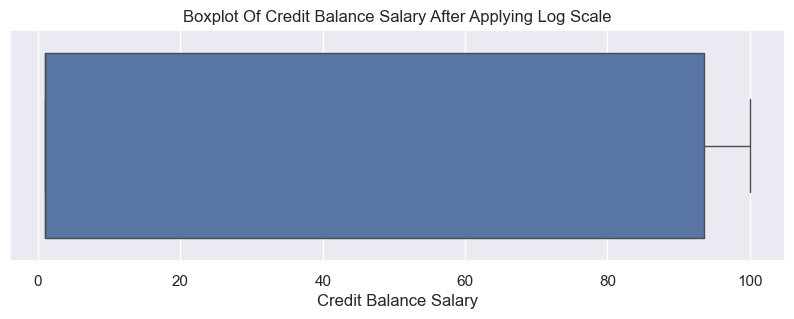

In [87]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['CreditBalanceSalary'])
plt.title("Boxplot Of Credit Balance Salary After Applying Log Scale")
plt.xlabel("Credit Balance Salary")
plt.show()

### Clean BalanceSalary - Apply Log Scale

In [88]:
df['BalanceSalary'].max(), df['BalanceSalary'].min() 

(7.92691828502115e+16, 0.0)

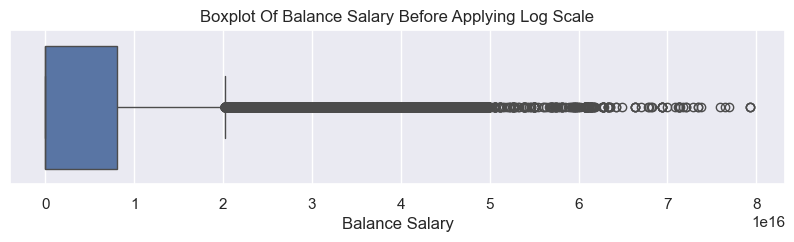

In [89]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['BalanceSalary'])
plt.title("Boxplot Of Balance Salary Before Applying Log Scale")
plt.xlabel("Balance Salary")
plt.show()

In [90]:
x = apply_log_scale_range_to_large_columns( df['BalanceSalary'] )
df['BalanceSalary'] = x
# 
df['BalanceSalary'].min(), df['BalanceSalary'].max()

(1.0, 100.0)

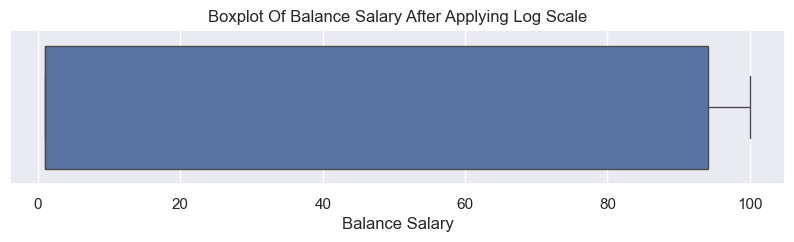

In [91]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['BalanceSalary'])
plt.title("Boxplot Of Balance Salary After Applying Log Scale")
plt.xlabel("Balance Salary")
plt.show()

### Clean Tenure Age - Apply Log Scale

In [92]:
df['TenureAge'].min(), df['TenureAge'].max()

(0.0, 6.12244897959183e+16)

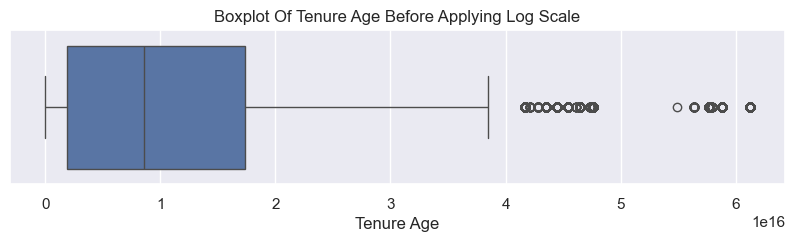

In [93]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TenureAge'])
plt.title("Boxplot Of Tenure Age Before Applying Log Scale")
plt.xlabel("Tenure Age")
plt.show()

In [94]:
x = apply_log_scale_range_to_large_columns( df['TenureAge'] )
df['TenureAge'] = x
# 
df['TenureAge'].min(), df['TenureAge'].max()

(1.0, 100.0)

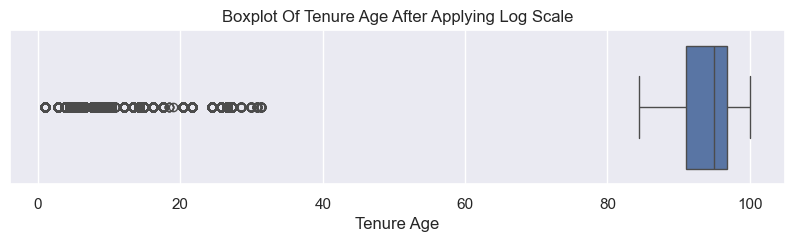

In [95]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['TenureAge'])
plt.title("Boxplot Of Tenure Age After Applying Log Scale")
plt.xlabel("Tenure Age")
plt.show()

### Clean EstimatedSalary

In [96]:
df['EstimatedSalary'].min(), df['EstimatedSalary'].max()

(118.0, 38190168.0)

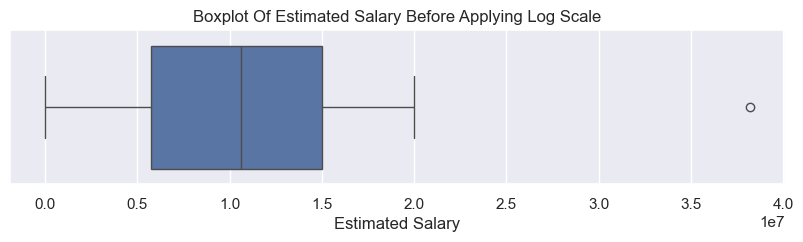

In [97]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['EstimatedSalary'])
plt.title("Boxplot Of Estimated Salary Before Applying Log Scale")
plt.xlabel("Estimated Salary")
plt.show()

In [98]:
x = apply_log_scale_range_to_large_columns( df['EstimatedSalary'] )
df['EstimatedSalary'] = x
df['EstimatedSalary'].min(), df['EstimatedSalary'].max()

(1.0, 100.0)

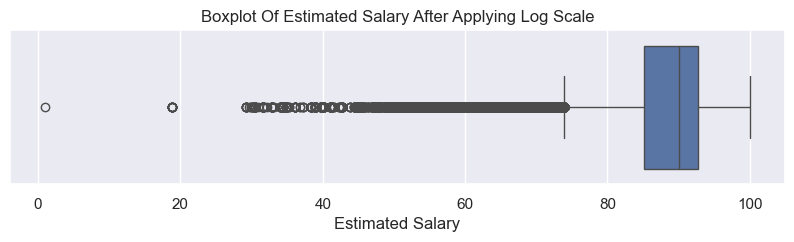

In [99]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['EstimatedSalary'])
plt.title("Boxplot Of Estimated Salary After Applying Log Scale")
plt.xlabel("Estimated Salary")
plt.show()

### Clean Balance

In [100]:
df['Balance'].min(), df['Balance'].max()

(0.0, 250898.09)

### Check datasets

#### check data types

In [101]:
df.dtypes.to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,float64,float64


#### check na values

In [102]:
df.isna().sum().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### check null values

In [103]:
df.isnull().sum().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Descriptive Statistics

### Count of the entire values

In [104]:
sample_count = df.shape[0]
sample_count

174459

In [105]:
7.0623866e+03

7062.3866

### Show the sum for eact column of the dataset

In [106]:
column_sums = df.sum()
column_sums.to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,114466131.0,6659583.81,875787.0,9.881119e+09,270967.0,131068.0,86981.0,1.517794e+07,36901.0,136903.0,33385708.26,288599.0,76194.0,7.721224e+06,7.726662e+06,1.384290e+07


### Show the mode of the dataset

- showing the most appearing value in each column

In [107]:
df.mode()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,850.0,37.0,2.0,0.0,2.0,1,0,88.617484,0,0.0,0.0,1,0,1.0,1.0,1.0


### show the median value in each column

In [108]:
df.median().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,659.0,37.0,5.0,0.0,2.0,1.0,0.0,89.994705,0.0,0.0,182.0,1.0,0.0,1.0,1.0,94.979013


### mean of all the columns

In [109]:
columns_means = column_sums / sample_count
columns_means.to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,656.120527,38.172773,5.020016,56638.631618,1.553184,0.751283,0.498576,87.000067,0.211517,0.784729,191.367073,1.654251,0.436744,44.258098,44.289269,79.347591


### standard deviation for every column, sample, not population
- to show the data are spread out from the mean for each column

In [110]:
df.std().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,81.109536,8.965642,2.811124,62978.289366,0.549289,0.432271,0.499999,8.653067,0.408385,0.871606,118.761871,0.817565,0.495984,46.279764,46.30879,33.333508


### variance of the columns
- the variance of each column

In [111]:
df.var().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,6578.756839,80.382744,7.902418,3.966265e+09,0.301719,0.186858,0.249999,74.875563,0.166778,0.759697,14104.381893,0.668412,0.246,2141.816529,2144.504053,1111.122728


### quantile ranges

In [112]:
df.quantile([0.25, 0.5, 0.75])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0.25,597.0,32.0,3.0,0.000,1.0,1.0,0.0,85.191754,0.0,0.0,93.0,1.0,0.0,1.00000,1.0000,91.094685
0.50,659.0,37.0,5.0,0.000,2.0,1.0,0.0,89.994705,0.0,0.0,182.0,1.0,0.0,1.00000,1.0000,94.979013
0.75,710.0,42.0,7.0,120720.725,2.0,1.0,1.0,92.717965,0.0,2.0,272.0,2.0,1.0,93.60963,94.1915,96.776497


### z-score values of the samples
- the z-score of all the values

In [113]:
(df - df.mean()) / df.std()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,0.146462,-0.576955,-0.718580,-0.899336,0.813443,0.575374,-0.997152,0.830826,-0.517935,-0.900325,-0.777750,-0.800244,-0.880562,-0.934709,-0.934796,0.473021
1,-0.359027,-0.576955,-1.430039,-0.899336,0.813443,0.575374,1.002850,-2.419052,-0.517935,1.394289,-1.333484,-0.800244,-0.880562,-0.934709,-0.934796,0.565530
2,0.269752,0.203803,1.771528,-0.899336,0.813443,0.575374,-0.997152,0.847660,-0.517935,-0.900325,1.756733,-0.800244,-0.880562,-0.934709,-0.934796,-2.100075
3,-0.926161,-0.465418,-1.074309,1.464694,-1.007091,0.575374,1.002850,0.141865,-0.517935,0.246982,-1.038777,-0.800244,-0.880562,1.090509,1.120365,0.616495
4,0.738254,-0.576955,-0.007120,-0.899336,0.813443,0.575374,1.002850,-1.414570,-0.517935,1.394289,-0.222016,1.646046,-0.880562,-0.934709,-0.934796,0.512271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,-0.149434,-1.134640,0.704339,1.562789,-1.007091,0.575374,-0.997152,-0.818254,-0.517935,-0.900325,0.039010,-0.800244,-0.880562,1.156852,1.054550,-2.100075
175024,1.773891,-1.023103,-1.074309,-0.899336,0.813443,-1.737990,-0.997152,0.760113,-0.517935,-0.900325,-1.122979,-0.800244,1.135632,-0.934709,-0.934796,0.451795
175025,1.416350,0.092266,-0.007120,-0.899336,0.813443,0.575374,-0.997152,0.258894,-0.517935,-0.900325,0.030590,-0.800244,-0.880562,-0.934709,-0.934796,0.322513
175026,-1.727547,-0.353881,1.771528,0.011607,-1.007091,0.575374,1.002850,0.308399,-0.517935,0.246982,1.335723,-0.800244,-0.880562,1.147959,1.057832,0.384086


### coeficient of variance

In [114]:
mean_values = df.mean()
std_values = df.std()
coefficient_of_variation = (std_values / mean_values)
# 
coefficient_of_variation.to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,0.12362,0.23487,0.559983,1.111932,0.353654,0.575377,1.002856,0.09946,1.930746,1.11071,0.620597,0.49422,1.135639,1.045679,1.045598,0.420095


### Standard error of the column
- to show the mean of the sample, is far from the mean of the population

In [115]:
standard_errors = df.apply(lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
standard_errors.to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,0.194189,0.021465,0.00673,150.78015,0.001315,0.001035,0.001197,0.020717,0.000978,0.002087,0.284335,0.001957,0.001187,0.110801,0.110871,0.079806


### Confidence level

In [116]:
confidence = 0.95
# 
stats_df_mean = df.mean()
n = df.shape[0]
stderr = stats.sem(df)
interval = stderr * stats.t.ppf( ( 1 + confidence ) / 2.0, n - 1)
# 
(stats_df_mean - interval).round(3).to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,655.74,38.131,5.007,56343.106,1.551,0.749,0.496,86.959,0.21,0.781,190.81,1.65,0.434,44.041,44.072,79.191


### Kurtosis
- a statistical measure that describes the tails of a distribution of data

In [117]:
df.kurtosis().to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,-0.075621,1.565522,-1.157925,-1.612405,-0.215724,-0.648301,-1.99999,5.318344,-0.00395,-1.194811,0.040685,-1.137582,-1.93496,-1.97349,-1.974951,0.753822


### Skewness
- explains how the lopsided the data is
- positive : means the data is skewed to the right
- negative : means the data is skewed to the left

In [118]:
df.apply(skew).to_frame().T

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge
0,-0.065759,0.979197,0.006752,0.351596,0.393557,-1.162619,0.005698,-2.071786,1.412804,0.52445,0.548705,0.71164,0.255072,0.138927,0.138119,-1.631756


### Geometric mean

In [119]:
# np.prod(df) ** (1 / len(df))
# 
# gm = gmean(df)
# gm

# Data Visualisation

In [120]:
df['Target'] = df['Exited'].apply( lambda x : "not exited" if x == 0 else "exited" )

### show distribition between churned and not churned

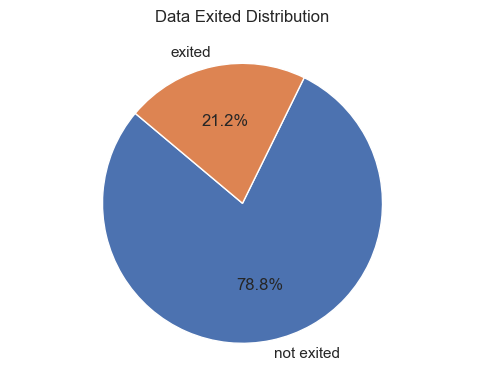

In [121]:
values_ = df['Target'].value_counts().values
labels_ = df['Target'].value_counts().index.values
n = df['Target'].value_counts().index.name # column name
colors = sns.set(style="darkgrid")
# 
plt.figure(figsize=(6, 4))
plt.pie(values_, labels=labels_, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Data Exited Distribution', pad=20)
plt.grid(True)
plt.show()

### Show relationship between the age and the creditscore

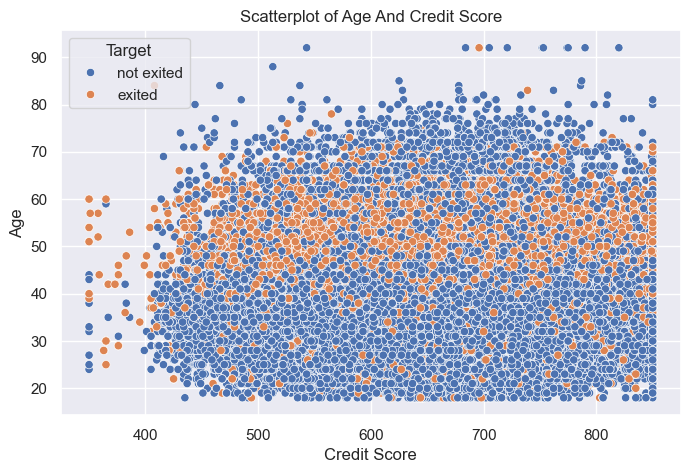

In [122]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="CreditScore", y="Age", data=df, hue='Target')
plt.title("Scatterplot of Age And Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Age")
plt.show()

### Show relationship between the age and balance
- shows that most of the salaries are between 50K and 200K
- there is a lot iog zeroes salaries as well

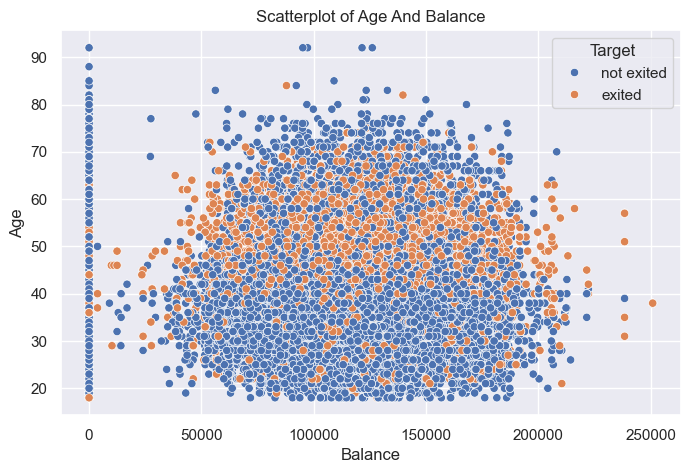

In [123]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Balance", y="Age", data=df, hue='Target')
plt.title("Scatterplot of Age And Balance")
plt.xlabel("Balance")
plt.ylabel("Age")
plt.show()

### show country distribution

In [124]:
def c(x):
  if str(x).lower() == '1': return 'France'
  elif str(x).lower() == '2': return 'Germany'
  elif str(x).lower() == '3': return 'Spain'
  else: return ' unknown'
  
df['Country_'] = df['Country'].apply(c)

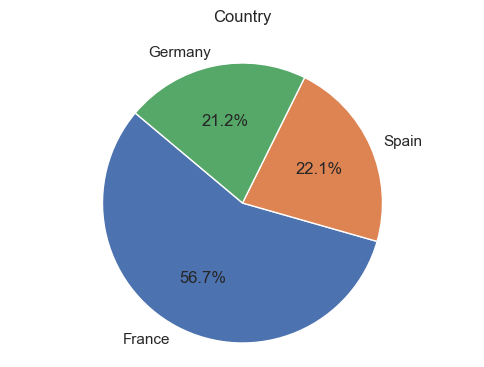

In [125]:
values_ = df['Country_'].value_counts().values
labels_ = df['Country_'].value_counts().index.values
n = df['Country_'].value_counts().index.name # column name
colors = sns.set(style="darkgrid")
# 
plt.figure(figsize=(6, 4))
plt.pie(values_, labels=labels_, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Country', pad=20)
plt.grid(True)
plt.show()

### show gender counts

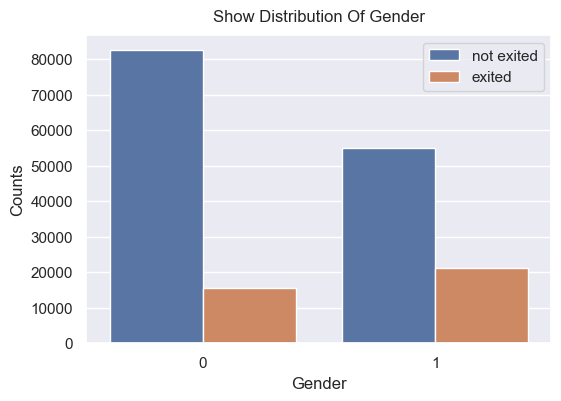

In [126]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Target')
plt.title("Show Distribution Of Gender", pad=10)
plt.ylabel("Counts")
plt.xlabel("Gender")
plt.legend(loc=1)
plt.show()

### Reg plot

In [127]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge,Target,Country_
0,668.0,33.0,3.0,0.00,2.0,1,0,94.189263,0,0.0,99.0,1,0,1.000000,1.000000,95.115039,not exited,France
1,627.0,33.0,1.0,0.00,2.0,1,1,66.067847,0,2.0,33.0,1,0,1.000000,1.000000,98.198689,not exited,France
2,678.0,40.0,10.0,0.00,2.0,1,0,94.334925,0,0.0,400.0,1,0,1.000000,1.000000,9.344730,not exited,France
3,581.0,34.0,2.0,148882.54,1.0,1,1,88.227632,0,1.0,68.0,1,0,94.726588,96.172011,99.897537,not exited,France
4,716.0,33.0,5.0,0.00,2.0,1,1,74.759700,0,2.0,165.0,3,0,1.000000,1.000000,96.423381,not exited,Spain


### correlation of each feature with the other features

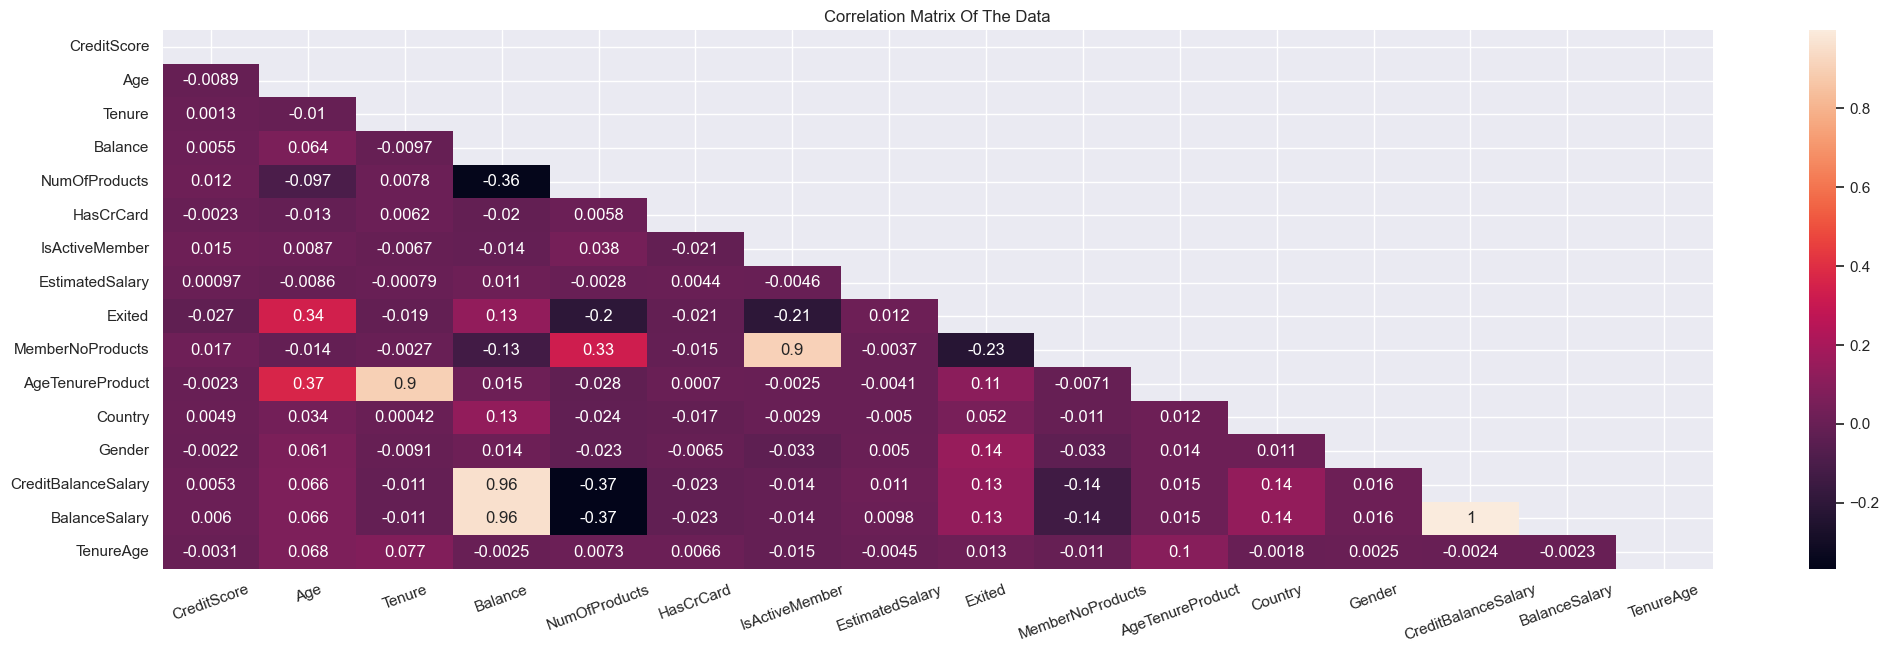

In [128]:
bbbb = df.drop(columns=['Country_', 'Target'], axis=1)

plt.figure(figsize=(25, 7))
mask = np.triu(np.ones_like(bbbb.corr(), dtype=bool))
sns.heatmap(bbbb.corr(), annot=True, mask=mask)
plt.xticks(rotation=20)
plt.title("Correlation Matrix Of The Data")
plt.show()

### Pairplot

In [129]:
# plt.figure(figsize=(10, 89))
# sns.pairplot(data=df, hue='Exited', kind='scatter')
# plt.title("Pair Plot Of My Dataset")
# plt.show()

### Histplot

### 

### Box Plot of Largest Numeric Features

In [130]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge,Target,Country_
0,668.0,33.0,3.0,0.00,2.0,1,0,94.189263,0,0.0,99.0,1,0,1.000000,1.000000,95.115039,not exited,France
1,627.0,33.0,1.0,0.00,2.0,1,1,66.067847,0,2.0,33.0,1,0,1.000000,1.000000,98.198689,not exited,France
2,678.0,40.0,10.0,0.00,2.0,1,0,94.334925,0,0.0,400.0,1,0,1.000000,1.000000,9.344730,not exited,France
3,581.0,34.0,2.0,148882.54,1.0,1,1,88.227632,0,1.0,68.0,1,0,94.726588,96.172011,99.897537,not exited,France
4,716.0,33.0,5.0,0.00,2.0,1,1,74.759700,0,2.0,165.0,3,0,1.000000,1.000000,96.423381,not exited,Spain


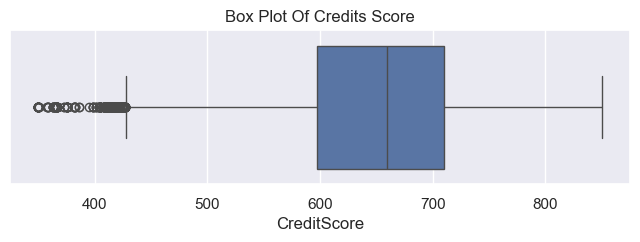

In [131]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=df, x='CreditScore' )
plt.title("Box Plot Of Credits Score")
plt.show()

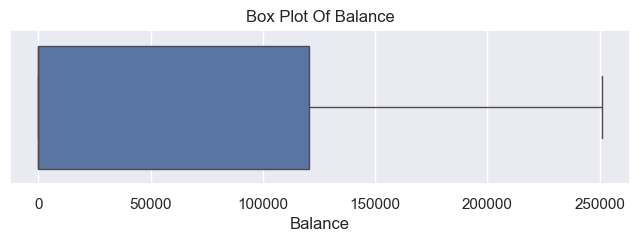

In [132]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=df, x='Balance' )
plt.title("Box Plot Of Balance")
plt.show()

### Box Plot of Other Features

In [133]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,MemberNoProducts,AgeTenureProduct,Country,Gender,CreditBalanceSalary,BalanceSalary,TenureAge,Target,Country_
0,668.0,33.0,3.0,0.00,2.0,1,0,94.189263,0,0.0,99.0,1,0,1.000000,1.000000,95.115039,not exited,France
1,627.0,33.0,1.0,0.00,2.0,1,1,66.067847,0,2.0,33.0,1,0,1.000000,1.000000,98.198689,not exited,France
2,678.0,40.0,10.0,0.00,2.0,1,0,94.334925,0,0.0,400.0,1,0,1.000000,1.000000,9.344730,not exited,France
3,581.0,34.0,2.0,148882.54,1.0,1,1,88.227632,0,1.0,68.0,1,0,94.726588,96.172011,99.897537,not exited,France
4,716.0,33.0,5.0,0.00,2.0,1,1,74.759700,0,2.0,165.0,3,0,1.000000,1.000000,96.423381,not exited,Spain


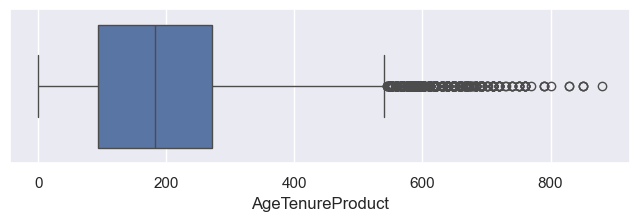

In [134]:

plt.figure(figsize=(8, 2))
sns.boxplot(data=df, x='AgeTenureProduct')
plt.show()

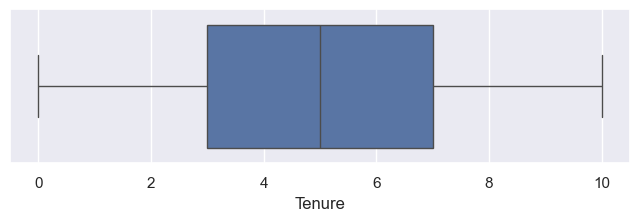

In [135]:

plt.figure(figsize=(8, 2))
sns.boxplot(data=df, x='Tenure')
# plt.xticks(rotation=10)
plt.show()

# Reflection of the data

### What are the gaps in your programming or stats knowledge?
- i have done statistical courses in first year and i have knowledge of some basic and intermediate statistics terms
- i have knowledge of building deep learning model, with cnn, lstm

### What i learn and what i can do better for next
- i learn to do my assignment early
- i learn how to explain data and not change it to fit what i wants it to show
- i learn about data intepretation and presentation
- i learn about different datasets and what they mean

### Reflections on your learnings between this assignment and the previous one
- this one is easy for me
- the excel assignment was hard to navigate around excel app
- data, python is very interesting
- finding the right data is fun
- data cleaning was the most fun part about this

### What was different between Python and Excel?

- python is easy to use because of syntax
- python can handle a lot of data
- easy to clean data using python


### When will you use either of them?
- use excel when i have less clean data 
- use python when i have a lot of data
- use python when i'm not in a hurry


### If you could do this assignment over what would you do differently?
- i would plot most relationship to show my data and what is its telling us
- i would understand, how a column is affected by the other column
